# 602 Project: 311 City Service Requests in DC Completion Time Prediction
# GROUP - 1


##### - Snehal Choudhari

##### About the Project:
- 311 is a non-emergency telephone number that residents of many cities in the United States can use to access local government services. When someone dials 311, they can report non-emergency issues, seek information, or request various municipal services.
- In the course of this project, we have engaged with diverse machine learning models to forecast different aspects associated with 311 city service requests and their subsequent fulfillment.

##### Problem Statements:
1. Predict if the service is completed within allocated timeframe or got delayed.
2. Predict the time required for the completion of service requests.
3. Predict the zip code of the location where the service is required.

##### Dataset Source: 
https://opendata.dc.gov/datasets/DCGIS::311-city-service-requests-in-2021/about

### Exploratory Data Analysis (EDA)

In [1]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
import seaborn as sns

In [2]:
# Read the csv file to a dataframe:

data=pd.read_csv("311_City_Service_Requests_in_2021.csv")
data.head()

C:\Users\gaurk\AppData\Local\Temp\ipykernel_9088\575897284.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("311_City_Service_Requests_in_2021.csv")


,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 05:32:05+00,2021/01/06 15:34:42+00,...,20001.0,230050,5,NaN,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 05:06:02+00,2021/01/01 05:07:01+00,...,20032.0,301360,8,NaN,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2021/01/01 05:33:08+00,2021/01/05 05:55:04+00,...,20011.0,252336,4,NaN,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 11:58:18+00,2021/01/04 12:54:36+00,...,20019.0,24709,7,NaN,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8},NaN,NaN,NaN,NaN
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2021/01/01 06:05:25+00,2021/01/26 21:40:13+00,...,20016.0,266186,3,NaN,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B},NaN,NaN,NaN,NaN


In [3]:
data.shape

(360816, 36)

In [4]:
data.columns

Index(['X', 'Y', 'OBJECTID', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'SERVICEREQUESTID', 'PRIORITY',
       'STREETADDRESS', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'CITY',
       'STATE', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'WARD', 'DETAILS',
       'GIS_ID', 'GLOBALID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED'],
      dtype='object')

In [5]:
# Display all the unique values in the column
data.nunique()

X                              98538
Y                              98538
OBJECTID                      360816
SERVICECODE                      118
SERVICECODEDESCRIPTION           119
SERVICETYPECODEDESCRIPTION        25
ORGANIZATIONACRONYM               13
SERVICECALLCOUNT                   1
ADDDATE                       356709
RESOLUTIONDATE                344844
SERVICEDUEDATE                282738
SERVICEORDERDATE              356709
INSPECTIONFLAG                     0
INSPECTIONDATE                     0
INSPECTORNAME                      0
SERVICEORDERSTATUS                12
STATUS_CODE                        0
SERVICEREQUESTID              360816
PRIORITY                           6
STREETADDRESS                 101041
XCOORD                         93602
YCOORD                         93978
LATITUDE                       97667
LONGITUDE                      97908
CITY                               1
STATE                              1
ZIPCODE                          111
M

In [6]:
%%time
# drop the columns that are not required for our models and they have majority or all the null values
df = data.drop(['X','Y','INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME', 'STATUS_CODE', 
                    'GIS_ID','CREATOR','CREATED','EDITOR' ,'EDITED','SERVICECALLCOUNT', 'GLOBALID','DETAILS'],axis=1)

Wall time: 69.1 ms


In [7]:
df.dtypes

OBJECTID                        int64
SERVICECODE                    object
SERVICECODEDESCRIPTION         object
SERVICETYPECODEDESCRIPTION     object
ORGANIZATIONACRONYM            object
ADDDATE                        object
RESOLUTIONDATE                 object
SERVICEDUEDATE                 object
SERVICEORDERDATE               object
SERVICEORDERSTATUS             object
SERVICEREQUESTID               object
PRIORITY                       object
STREETADDRESS                  object
XCOORD                        float64
YCOORD                        float64
LATITUDE                      float64
LONGITUDE                     float64
CITY                           object
STATE                          object
ZIPCODE                       float64
MARADDRESSREPOSITORYID          int64
WARD                           object
dtype: object

In [8]:
# Converting the Objects to datetime for the date realted columns:
df['ADDDATE'] = pd.to_datetime(df['ADDDATE'])
df['RESOLUTIONDATE'] = pd.to_datetime(df['RESOLUTIONDATE'])
df['SERVICEDUEDATE'] = pd.to_datetime(df['SERVICEDUEDATE'])
df['SERVICEORDERDATE'] = pd.to_datetime(df['SERVICEORDERDATE'])

df.dtypes

OBJECTID                                    int64
SERVICECODE                                object
SERVICECODEDESCRIPTION                     object
SERVICETYPECODEDESCRIPTION                 object
ORGANIZATIONACRONYM                        object
ADDDATE                       datetime64[ns, UTC]
RESOLUTIONDATE                datetime64[ns, UTC]
SERVICEDUEDATE                datetime64[ns, UTC]
SERVICEORDERDATE              datetime64[ns, UTC]
SERVICEORDERSTATUS                         object
SERVICEREQUESTID                           object
PRIORITY                                   object
STREETADDRESS                              object
XCOORD                                    float64
YCOORD                                    float64
LATITUDE                                  float64
LONGITUDE                                 float64
CITY                                       object
STATE                                      object
ZIPCODE                                   float64


In [9]:
# Drop the Null values on the columns which are required to be not null 
import pandas as pd
df = df.dropna(subset=['RESOLUTIONDATE'])
df = df.dropna(subset=['PRIORITY'])
df = df.dropna(subset=['SERVICEDUEDATE'])
df = df.dropna(subset=['ZIPCODE','WARD','SERVICEORDERSTATUS', 'PRIORITY','SERVICECODE', 'SERVICECODEDESCRIPTION', 'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM'])

In [10]:
# For the problem Statement-1 , Calculate the target variable, to get that calculate the timespan of the delay
df['Due'] = (df['SERVICEDUEDATE'] - df['RESOLUTIONDATE']).dt.total_seconds() / 3600

In [11]:
# Create "DueStatus" column : This is out target variable for problem statement-1 . 
df['DueStatus'] = df['Due'].apply(lambda x: 'Yes' if x < 0 else 'No')
df.head()

,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SERVICEORDERSTATUS,...,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,Due,DueStatus
0,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:32:05+00:00,2021-01-06 15:34:42+00:00,2021-01-06 23:59:00+00:00,2021-01-01 05:32:05+00:00,Closed,...,138519.22,38.914538,-77.014820,WASHINGTON,DC,20001.0,230050,5,8.405000,No
1,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:06:02+00:00,2021-01-01 05:07:01+00:00,2021-01-09 04:59:00+00:00,2021-01-01 05:06:02+00:00,Voided,...,131768.69,38.853728,-76.995045,WASHINGTON,DC,20032.0,301360,8,191.866389,No
2,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,2021-01-01 05:33:08+00:00,2021-01-05 05:55:04+00:00,2021-01-12 05:33:08+00:00,2021-01-01 05:33:08+00:00,Closed,...,142011.95,38.946000,-77.024384,WASHINGTON,DC,20011.0,252336,4,167.634444,No
3,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 11:58:18+00:00,2021-01-04 12:54:36+00:00,2021-01-05 04:59:00+00:00,2021-01-01 11:58:18+00:00,Closed,...,134521.77,38.878514,-76.942115,WASHINGTON,DC,20019.0,24709,7,16.073333,No
4,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,2021-01-01 06:05:25+00:00,2021-01-26 21:40:13+00:00,2021-01-12 06:05:25+00:00,2021-01-01 06:05:25+00:00,Closed,...,142022.34,38.946067,-77.083342,WASHINGTON,DC,20016.0,266186,3,-351.580000,Yes


In [12]:
unique_values_counts = df['DueStatus'].value_counts()

# Display the unique values and their counts
print(unique_values_counts)

No     293726
Yes     61370
Name: DueStatus, dtype: int64


In [13]:
df['Timespan'] = (df['RESOLUTIONDATE'] - df['ADDDATE']).dt.total_seconds() / 3600
df.head()

,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SERVICEORDERSTATUS,...,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,Due,DueStatus,Timespan
0,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:32:05+00:00,2021-01-06 15:34:42+00:00,2021-01-06 23:59:00+00:00,2021-01-01 05:32:05+00:00,Closed,...,38.914538,-77.014820,WASHINGTON,DC,20001.0,230050,5,8.405000,No,130.043611
1,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:06:02+00:00,2021-01-01 05:07:01+00:00,2021-01-09 04:59:00+00:00,2021-01-01 05:06:02+00:00,Voided,...,38.853728,-76.995045,WASHINGTON,DC,20032.0,301360,8,191.866389,No,0.016389
2,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,2021-01-01 05:33:08+00:00,2021-01-05 05:55:04+00:00,2021-01-12 05:33:08+00:00,2021-01-01 05:33:08+00:00,Closed,...,38.946000,-77.024384,WASHINGTON,DC,20011.0,252336,4,167.634444,No,96.365556
3,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 11:58:18+00:00,2021-01-04 12:54:36+00:00,2021-01-05 04:59:00+00:00,2021-01-01 11:58:18+00:00,Closed,...,38.878514,-76.942115,WASHINGTON,DC,20019.0,24709,7,16.073333,No,72.938333
4,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,2021-01-01 06:05:25+00:00,2021-01-26 21:40:13+00:00,2021-01-12 06:05:25+00:00,2021-01-01 06:05:25+00:00,Closed,...,38.946067,-77.083342,WASHINGTON,DC,20016.0,266186,3,-351.580000,Yes,615.580000


In [14]:
# Since we can't find the correlation with date type, we have converted them to numerical format.

# For ADDDATE, we have considered the minumum date value from the dataset and differentiated all other ADDDATE values from that reference date, 
df['ADDDATE'] = (df['ADDDATE'] - df['ADDDATE'].min()).dt.total_seconds() / 3600

# Similarlly, we have calculated the RESOLUTIONDATE and SERVICEDUEDATE
df['RESOLUTIONDATE'] = (df['RESOLUTIONDATE'] - df['RESOLUTIONDATE'].min()).dt.total_seconds() / 3600
df['SERVICEDUEDATE'] = (df['SERVICEDUEDATE'] - df['SERVICEDUEDATE'].min()).dt.total_seconds() / 3600

df.head(10)

,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SERVICEORDERSTATUS,...,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,Due,DueStatus,Timespan
0,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.434167,130.461389,75.495556,2021-01-01 05:32:05+00:00,Closed,...,38.914538,-77.014820,WASHINGTON,DC,20001.0,230050,5,8.405000,No,130.043611
1,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,0.000000,0.000000,128.495556,2021-01-01 05:06:02+00:00,Voided,...,38.853728,-76.995045,WASHINGTON,DC,20032.0,301360,8,191.866389,No,0.016389
2,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.451667,96.800833,201.064444,2021-01-01 05:33:08+00:00,Closed,...,38.946000,-77.024384,WASHINGTON,DC,20011.0,252336,4,167.634444,No,96.365556
3,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,6.871111,79.793056,32.495556,2021-01-01 11:58:18+00:00,Closed,...,38.878514,-76.942115,WASHINGTON,DC,20019.0,24709,7,16.073333,No,72.938333
4,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.989722,616.553333,201.602500,2021-01-01 06:05:25+00:00,Closed,...,38.946067,-77.083342,WASHINGTON,DC,20016.0,266186,3,-351.580000,Yes,615.580000
5,9591904,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.893333,152.290833,104.495556,2021-01-01 05:59:38+00:00,Closed,...,38.961580,-76.998092,WASHINGTON,DC,20011.0,2761,4,15.575556,No,151.413889
6,9591905,S0441,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,0.931944,36.919722,33.544722,2021-01-01 06:01:57+00:00,Closed,...,38.961852,-76.998932,WASHINGTON,DC,20011.0,5538,4,59.995833,No,36.004167
7,9591906,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.718889,153.456111,99.495556,2021-01-01 14:49:10+00:00,Closed (Duplicate),...,38.950285,-77.024035,WASHINGTON,DC,20011.0,251903,4,9.410278,No,143.753611
8,9591907,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.298056,128.124722,80.495556,2021-01-01 14:23:55+00:00,Closed,...,38.921697,-77.040369,WASHINGTON,DC,20009.0,235663,1,15.741667,No,118.843056
9,9591908,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,8.836944,9.320556,17.449722,2021-01-01 13:56:15+00:00,Closed,...,38.902268,-76.949958,WASHINGTON,DC,20019.0,309256,7,71.500000,No,0.500000


###### Performing Label Encoding for all the categorical features

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['WARD', 'ZIPCODE', 'SERVICEORDERSTATUS', 'PRIORITY']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Display the DataFrame with the new encoded columns
df.head(10)


,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SERVICEORDERSTATUS,...,ZIPCODE,MARADDRESSREPOSITORYID,WARD,Due,DueStatus,Timespan,WARD_encoded,ZIPCODE_encoded,SERVICEORDERSTATUS_encoded,PRIORITY_encoded
0,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.434167,130.461389,75.495556,2021-01-01 05:32:05+00:00,Closed,...,20001.0,230050,5,8.405000,No,130.043611,4,0,1,4
1,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,0.000000,0.000000,128.495556,2021-01-01 05:06:02+00:00,Voided,...,20032.0,301360,8,191.866389,No,0.016389,7,20,6,4
2,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.451667,96.800833,201.064444,2021-01-01 05:33:08+00:00,Closed,...,20011.0,252336,4,167.634444,No,96.365556,3,10,1,4
3,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,6.871111,79.793056,32.495556,2021-01-01 11:58:18+00:00,Closed,...,20019.0,24709,7,16.073333,No,72.938333,6,16,1,4
4,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.989722,616.553333,201.602500,2021-01-01 06:05:25+00:00,Closed,...,20016.0,266186,3,-351.580000,Yes,615.580000,2,13,1,4
5,9591904,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.893333,152.290833,104.495556,2021-01-01 05:59:38+00:00,Closed,...,20011.0,2761,4,15.575556,No,151.413889,3,10,1,4
6,9591905,S0441,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,0.931944,36.919722,33.544722,2021-01-01 06:01:57+00:00,Closed,...,20011.0,5538,4,59.995833,No,36.004167,3,10,1,4
7,9591906,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.718889,153.456111,99.495556,2021-01-01 14:49:10+00:00,Closed (Duplicate),...,20011.0,251903,4,9.410278,No,143.753611,3,10,2,4
8,9591907,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.298056,128.124722,80.495556,2021-01-01 14:23:55+00:00,Closed,...,20009.0,235663,1,15.741667,No,118.843056,0,8,1,4
9,9591908,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,8.836944,9.320556,17.449722,2021-01-01 13:56:15+00:00,Closed,...,20019.0,309256,7,71.500000,No,0.500000,6,16,1,4


In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['SERVICECODE', 'SERVICECODEDESCRIPTION', 'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Display the DataFrame with the new encoded columns
df.head(10)


,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,SERVICEORDERDATE,SERVICEORDERSTATUS,...,DueStatus,Timespan,WARD_encoded,ZIPCODE_encoded,SERVICEORDERSTATUS_encoded,PRIORITY_encoded,SERVICECODE_encoded,SERVICECODEDESCRIPTION_encoded,SERVICETYPECODEDESCRIPTION_encoded,ORGANIZATIONACRONYM_encoded
0,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.434167,130.461389,75.495556,2021-01-01 05:32:05+00:00,Closed,...,No,130.043611,4,0,1,4,57,7,18,7
1,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,0.000000,0.000000,128.495556,2021-01-01 05:06:02+00:00,Voided,...,No,0.016389,7,20,6,4,1,1,18,7
2,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.451667,96.800833,201.064444,2021-01-01 05:33:08+00:00,Closed,...,No,96.365556,3,10,1,4,92,88,22,1
3,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,6.871111,79.793056,32.495556,2021-01-01 11:58:18+00:00,Closed,...,No,72.938333,6,16,1,4,57,7,18,7
4,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.989722,616.553333,201.602500,2021-01-01 06:05:25+00:00,Closed,...,Yes,615.580000,2,13,1,4,92,88,22,1
5,9591904,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.893333,152.290833,104.495556,2021-01-01 05:59:38+00:00,Closed,...,No,151.413889,3,10,1,4,57,7,18,7
6,9591905,S0441,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,0.931944,36.919722,33.544722,2021-01-01 06:01:57+00:00,Closed,...,No,36.004167,3,10,1,4,83,95,18,7
7,9591906,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.718889,153.456111,99.495556,2021-01-01 14:49:10+00:00,Closed (Duplicate),...,No,143.753611,3,10,2,4,57,7,18,7
8,9591907,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.298056,128.124722,80.495556,2021-01-01 14:23:55+00:00,Closed,...,No,118.843056,0,8,1,4,57,7,18,7
9,9591908,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,8.836944,9.320556,17.449722,2021-01-01 13:56:15+00:00,Closed,...,No,0.500000,6,16,1,4,65,56,14,7


- We have performed label encoding and we will use these encoded columns wherever the categorical columns are required.

#### Perform Feature Importance on the target variable DueStatus:

                              Feature  Importance
4                 SERVICECODE_encoded    0.334504
5      SERVICECODEDESCRIPTION_encoded    0.312161
6  SERVICETYPECODEDESCRIPTION_encoded    0.161725
1                     ZIPCODE_encoded    0.075091
0                        WARD_encoded    0.053526
7         ORGANIZATIONACRONYM_encoded    0.043534
2          SERVICEORDERSTATUS_encoded    0.016115
3                    PRIORITY_encoded    0.003343


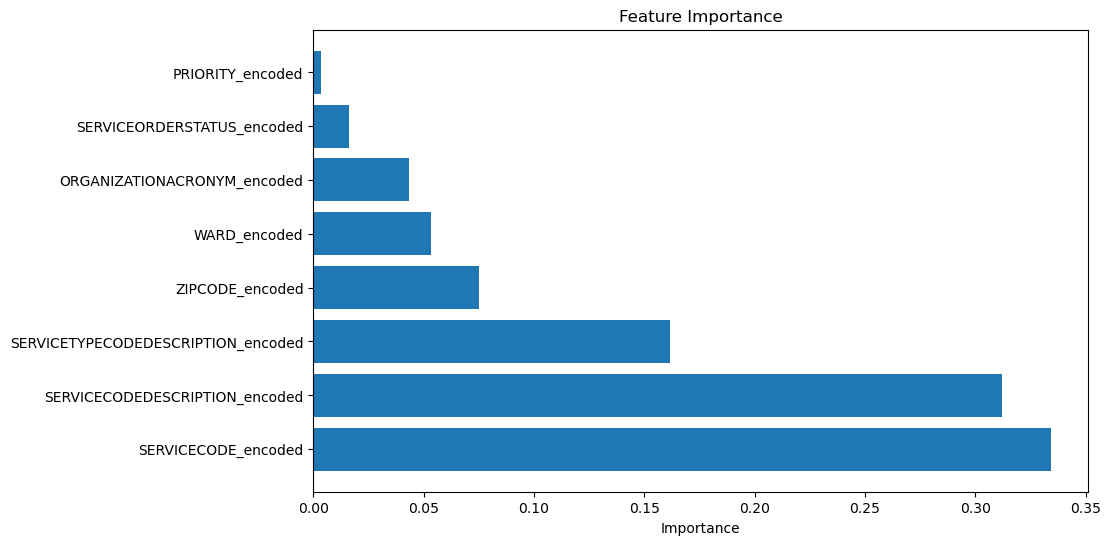

In [17]:
# Due to the time required for performing feature importance is huge , we tried to run it in 2 splits.
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


selected_columns = [
    'WARD_encoded', 'ZIPCODE_encoded', 'SERVICEORDERSTATUS_encoded', 'PRIORITY_encoded',
    'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded', 'ORGANIZATIONACRONYM_encoded'
]

# Selecting the features and target variable
X = df[selected_columns]
y = df['DueStatus'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()


                  Feature  Importance
2          RESOLUTIONDATE    0.529375
3          SERVICEDUEDATE    0.227546
1                 ADDDATE    0.073421
0                OBJECTID    0.070505
6  MARADDRESSREPOSITORYID    0.035239
5                  YCOORD    0.032540
4                  XCOORD    0.031375


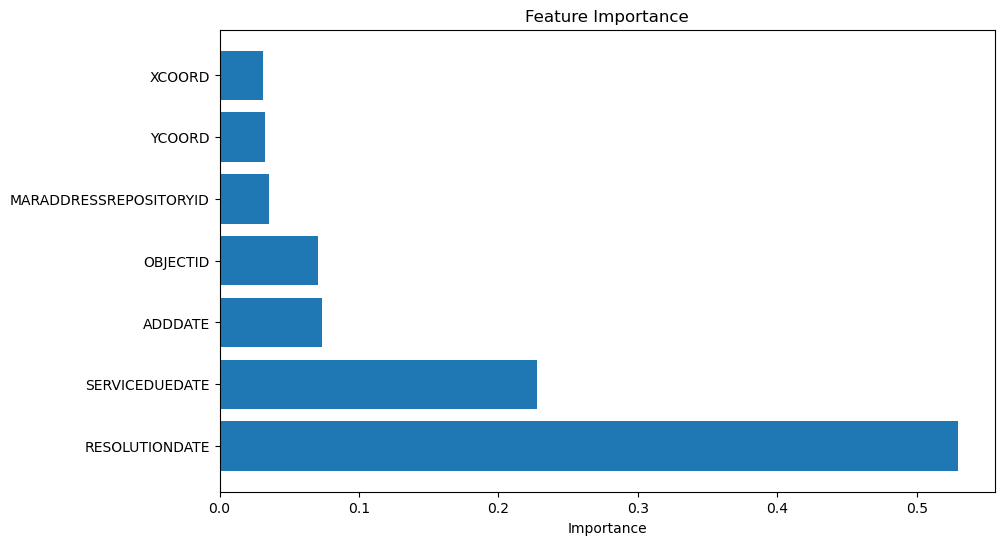

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


selected_columns = ['OBJECTID','ADDDATE','RESOLUTIONDATE','SERVICEDUEDATE','XCOORD','YCOORD', 'MARADDRESSREPOSITORYID']

# Selecting the features and target variable
X = df[selected_columns]
y = df['DueStatus'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()


In [19]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
top_features = correlation_matrix['Due'].abs().sort_values(ascending=False).head(7).index.tolist()[1:]

# Display the top 10 features
print("Top 10 Features:")
print(top_features)

Top 10 Features:
['Timespan', 'SERVICEDUEDATE', 'RESOLUTIONDATE', 'ORGANIZATIONACRONYM_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICECODE_encoded']


#### Implement various Classification Models to predict if the delay occured to complete the service request.

###### Logistic Regression 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 'SERVICEDUEDATE', 'RESOLUTIONDATE', 'ADDDATE', 'OBJECTID', 'LATITUDE', 'LONGITUDE' are continuous features
# 'SERVICECODE_DESCRIPTION_encoded', 'SERVICECODE_encoded', 'SERVICETYPECODEDESCRIPTION_encoded' are label encoded categorical features
selected_features = ['RESOLUTIONDATE','SERVICEDUEDATE','YCOORD','XCOORD', 'SERVICECODE_encoded','SERVICECODEDESCRIPTION_encoded','SERVICETYPECODEDESCRIPTION_encoded']
target_variable = 'DueStatus' 

# Reference X-coord and Y-coord
ref_XCOORD, ref_YCOORD = 400430.11, 131768.69

# Calculate distance from the reference point
X['Distance_coord'] = ((df['YCOORD'] - ref_YCOORD)**2 + (df['XCOORD'] - ref_XCOORD)**2)**0.5

# Selecting features and target variable
X = df[selected_features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the continuous features
scaler = StandardScaler()
X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE','YCOORD','XCOORD']] = scaler.fit_transform(X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE','YCOORD','XCOORD']])
X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE','YCOORD','XCOORD']] = scaler.transform(X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE','YCOORD','XCOORD']])

# Initialize and fit logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = logistic_model.predict(X_train)

# Predictions on the test set
y_test_pred = logistic_model.predict(X_test)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for testing set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate the model for training data
print(f"Training Accuracy: {accuracy_train:.4f}")
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model for testing data
print(f"Testing Accuracy: {accuracy_test:.4f}")
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))


C:\Users\gaurk\AppData\Local\Temp\ipykernel_9088\4261355082.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Distance_coord'] = ((df['YCOORD'] - ref_YCOORD)**2 + (df['XCOORD'] - ref_XCOORD)**2)**0.5
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9783
Training Set Classification Report:
              precision    recall  f1-score   support

          No       0.99      0.99      0.99    234938
         Yes       0.95      0.93      0.94     49138

    accuracy                           0.98    284076
   macro avg       0.97      0.96      0.96    284076
weighted avg       0.98      0.98      0.98    284076

Testing Accuracy: 0.9783

Testing Set Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.99      0.99     58788
         Yes       0.95      0.93      0.94     12232

    accuracy                           0.98     71020
   macro avg       0.97      0.96      0.96     71020
weighted avg       0.98      0.98      0.98     71020



- This model shows high performance on both the training and testing data sets.
- The model has performed good for the minority class as well. 

###### Decision Tree Classifier

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded' are selected features
# 'DueStatus' is the target variable
selected_features = ['RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded']
target_variable = 'DueStatus'

# Selecting features and target variable
X = df[selected_features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the continuous features
scaler = StandardScaler()
X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.fit_transform(X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']])
X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.transform(X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']])

# Initialize and fit Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Predictions on the test set
y_test_pred = decision_tree_model.predict(X_test)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for testing set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate the model for training data
print(f"Training Accuracy: {accuracy_train:.4f}")
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model for testing data
print(f"Testing Accuracy: {accuracy_test:.4f}")
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.0000
Training Set Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00    234938
         Yes       1.00      1.00      1.00     49138

    accuracy                           1.00    284076
   macro avg       1.00      1.00      1.00    284076
weighted avg       1.00      1.00      1.00    284076

Testing Accuracy: 0.9892

Testing Set Classification Report:
              precision    recall  f1-score   support

          No       0.99      1.00      0.99     58788
         Yes       0.98      0.96      0.97     12232

    accuracy                           0.99     71020
   macro avg       0.98      0.98      0.98     71020
weighted avg       0.99      0.99      0.99     71020



- The model performed 100% for the train data set but it is slighly weaker for the test dataset.
- this 100% results on train and lesser results on test set might be an indication of overfitting. 

###### Random Forest Classifier

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded' are selected features
# 'DueStatus' is the target variable
selected_features = ['RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded']
target_variable = 'DueStatus'

# Selecting features and target variable
X = df[selected_features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the continuous features
scaler = StandardScaler()
X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.fit_transform(X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']])
X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.transform(X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']])

# Initialize and fit Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = random_forest_model.predict(X_train)

# Predictions on the test set
y_test_pred = random_forest_model.predict(X_test)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for testing set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate the model for training data
print(f"Training Accuracy: {accuracy_train:.4f}")
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model for testing data
print(f"Testing Accuracy: {accuracy_test:.4f}")
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.0000
Training Set Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00    234938
         Yes       1.00      1.00      1.00     49138

    accuracy                           1.00    284076
   macro avg       1.00      1.00      1.00    284076
weighted avg       1.00      1.00      1.00    284076

Testing Accuracy: 0.9890

Testing Set Classification Report:
              precision    recall  f1-score   support

          No       0.99      1.00      0.99     58788
         Yes       0.99      0.95      0.97     12232

    accuracy                           0.99     71020
   macro avg       0.99      0.97      0.98     71020
weighted avg       0.99      0.99      0.99     71020



- The model performed 100% for the train data set but it is slighly weaker for the test dataset.
- this 100% results on train and lesser results on test set might be an indication of overfitting. 

- We tried to tune the random forest classifier model by performing the hyperparameters.
- Please note that since the hyperparameter tuning execution took a huge amount of time on our dataset, we have added the hyperparameters that we previously calculated and we are not running the code to get the best hyperparameter code everytime we execute the file.
- Below is the snip for the best hyperparameter set we got:
#### Applying Previously calculated Best Hyperparameters:
###### Best Hyperparameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}

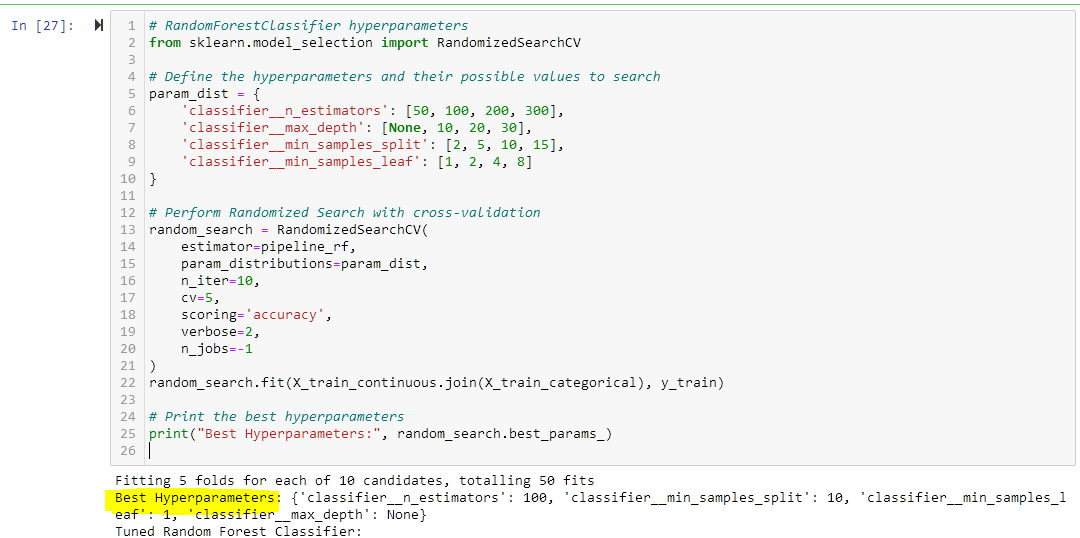

Please uncomment below part if code for hypermeters need to be executed:

In [ ]:
"""
# RandomForestClassifier hyperparameters 
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their possible values to search
param_dist = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 4, 8]
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
random_search.fit(X_train_continuous.join(X_train_categorical), y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model for prediction
best_rf_model = random_search.best_estimator_
y_train_pred_rf_tuned = best_rf_model.predict(X_train_continuous.join(X_train_categorical))
y_test_pred_rf_tuned = best_rf_model.predict(X_test_continuous.join(X_test_categorical))

# Evaluate the tuned random forest model on the training set
accuracy_train_rf_tuned = accuracy_score(y_train, y_train_pred_rf_tuned)
classification_rep_train_rf_tuned = classification_report(y_train, y_train_pred_rf_tuned)

# Evaluate the tuned random forest model on the test set
accuracy_test_rf_tuned = accuracy_score(y_test, y_test_pred_rf_tuned)
classification_rep_test_rf_tuned = classification_report(y_test, y_test_pred_rf_tuned)

print('Tuned Random Forest Classifier:')
print(f'Training Accuracy: {accuracy_train_rf_tuned}')
print(f'Training Classification Report:\n{classification_rep_train_rf_tuned}')
print(f'Test Accuracy: {accuracy_test_rf_tuned}')
print(f'Test Classification Report:\n{classification_rep_test_rf_tuned}')

"""

Executing using the Best hyperparameters found using above code:

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded' are selected features
# 'DueStatus' is the target variable
selected_features = ['RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded']
target_variable = 'DueStatus'

# Selecting features and target variable
X = df[selected_features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the continuous features
scaler = StandardScaler()
X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.fit_transform(X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']])
X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.transform(X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']])

# Create a pipeline with Random Forest classifier
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__min_samples_split': [10],
    'classifier__min_samples_leaf': [1],
    'classifier__max_depth': [None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator with hyperparameters
best_rf_model = grid_search.best_estimator_

# Predictions on the training set
y_train_pred = best_rf_model.predict(X_train)

# Predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for testing set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate the model for training data
print(f"Training Accuracy: {accuracy_train:.4f}")
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model for testing data
print(f"Testing Accuracy: {accuracy_test:.4f}")
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Training Accuracy: 0.9978
Training Set Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00    234938
         Yes       1.00      0.99      0.99     49138

    accuracy                           1.00    284076
   macro avg       1.00      0.99      1.00    284076
weighted avg       1.00      1.00      1.00    284076

Testing Accuracy: 0.9879

Testing Set Classification Report:
              precision    recall  f1-score   support

          No       0.99      1.00      0.99     58788
         Yes       0.99      0.94      0.96     12232

    accuracy                           0.99     71020
   macro avg       0.99      0.97      0.98     71020
weighted avg       0.99      0.99      0.99     71020



- Even after performing hyperparameters, the model didn't seem to be improved well. 

###### Gradient Boosting Classifier

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded' are selected features
# 'DueStatus' is the target variable
selected_features = ['RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded']
target_variable = 'DueStatus'

# Selecting features and target variable
X = df[selected_features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the continuous features
scaler = StandardScaler()
X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.fit_transform(X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']])
X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.transform(X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']])

# Initialize and fit Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = gradient_boosting_model.predict(X_train)

# Predictions on the test set
y_test_pred = gradient_boosting_model.predict(X_test)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for testing set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate the model for training data
print(f"Training Accuracy: {accuracy_train:.4f}")
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model for testing data
print(f"Testing Accuracy: {accuracy_test:.4f}")
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.9282
Training Set Classification Report:
              precision    recall  f1-score   support

          No       0.92      1.00      0.96    234938
         Yes       0.97      0.61      0.74     49138

    accuracy                           0.93    284076
   macro avg       0.95      0.80      0.85    284076
weighted avg       0.93      0.93      0.92    284076

Testing Accuracy: 0.9267

Testing Set Classification Report:
              precision    recall  f1-score   support

          No       0.92      1.00      0.96     58788
         Yes       0.96      0.60      0.74     12232

    accuracy                           0.93     71020
   macro avg       0.94      0.80      0.85     71020
weighted avg       0.93      0.93      0.92     71020



- The Gradient Boosting model performed well for the Majority class but it didn't work efficiently for the minority class for both the train and test datasets.

###### Gaussian Naive Bayes Classifier

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded' are selected features
# 'DueStatus' is the target variable
selected_features = ['RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICECODE_encoded', 'SERVICECODEDESCRIPTION_encoded', 'SERVICETYPECODEDESCRIPTION_encoded']
target_variable = 'DueStatus'

# Selecting features and target variable
X = df[selected_features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the continuous features
scaler = StandardScaler()
X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.fit_transform(X_train[['SERVICEDUEDATE', 'RESOLUTIONDATE']])
X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']] = scaler.transform(X_test[['SERVICEDUEDATE', 'RESOLUTIONDATE']])

# Initialize and fit Gaussian Naive Bayes model
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = gaussian_nb_model.predict(X_train)

# Predictions on the test set
y_test_pred = gaussian_nb_model.predict(X_test)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for testing set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate the model for training data
print(f"Training Accuracy: {accuracy_train:.4f}")
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model for testing data
print(f"Testing Accuracy: {accuracy_test:.4f}")
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8559
Training Set Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92    234938
         Yes       0.70      0.29      0.41     49138

    accuracy                           0.86    284076
   macro avg       0.78      0.63      0.67    284076
weighted avg       0.84      0.86      0.83    284076

Testing Accuracy: 0.8560

Testing Set Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92     58788
         Yes       0.70      0.29      0.41     12232

    accuracy                           0.86     71020
   macro avg       0.78      0.63      0.66     71020
weighted avg       0.84      0.86      0.83     71020



- The Guassian Naive Bayes model performed well for the Majority class but it didn't work efficiently for the minority class for both the train and test datasets. It performed even weaker than rest of the other models.

###### Based on the comprehensive analysis of the models, it can be inferred that Logistic Regression stands out as the most suitable model for this dataset and the given problem statement.

## Problem Statement 2 - Predict the time required for the completion of service requests.

- When a call is received for 311 city service, an ADDDATE and SERVICEORDERDATE is created. ADDDATE and SERVICEORDERDATE always has the exact same date and time.
- To avoid the colinearity problem, we have considered only ADDDATE for the scope of this problem.
- When the request is resolved, RESOLUTIONDATE gets created which is an indication day-time of the serive.
- IN this task, we are trying to predict hoe much time it takes to complete the service since it's received.
- But there are other various facotrs need to be considered to predict this apart from ADDDATE and RESOLUTIONDATE, such as what are the co-rodinates or the area of the service, or what's the deadline or servicedue date is. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
import seaborn as sns

In [27]:
timespan_df=pd.read_csv("311_City_Service_Requests_in_2021.csv")
timespan_df.head()

C:\Users\gaurk\AppData\Local\Temp\ipykernel_9088\610604656.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  timespan_df=pd.read_csv("311_City_Service_Requests_in_2021.csv")


,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 05:32:05+00,2021/01/06 15:34:42+00,...,20001.0,230050,5,NaN,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 05:06:02+00,2021/01/01 05:07:01+00,...,20032.0,301360,8,NaN,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2021/01/01 05:33:08+00,2021/01/05 05:55:04+00,...,20011.0,252336,4,NaN,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 11:58:18+00,2021/01/04 12:54:36+00,...,20019.0,24709,7,NaN,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8},NaN,NaN,NaN,NaN
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2021/01/01 06:05:25+00,2021/01/26 21:40:13+00,...,20016.0,266186,3,NaN,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B},NaN,NaN,NaN,NaN


In [28]:
timespan_df.shape

(360816, 36)

In [29]:
timespan_df.columns

Index(['X', 'Y', 'OBJECTID', 'SERVICECODE', 'SERVICECODEDESCRIPTION',
       'SERVICETYPECODEDESCRIPTION', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
       'ADDDATE', 'RESOLUTIONDATE', 'SERVICEDUEDATE', 'SERVICEORDERDATE',
       'INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME',
       'SERVICEORDERSTATUS', 'STATUS_CODE', 'SERVICEREQUESTID', 'PRIORITY',
       'STREETADDRESS', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE', 'CITY',
       'STATE', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'WARD', 'DETAILS',
       'GIS_ID', 'GLOBALID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED'],
      dtype='object')

In [30]:
timespan_df.nunique()

X                              98538
Y                              98538
OBJECTID                      360816
SERVICECODE                      118
SERVICECODEDESCRIPTION           119
SERVICETYPECODEDESCRIPTION        25
ORGANIZATIONACRONYM               13
SERVICECALLCOUNT                   1
ADDDATE                       356709
RESOLUTIONDATE                344844
SERVICEDUEDATE                282738
SERVICEORDERDATE              356709
INSPECTIONFLAG                     0
INSPECTIONDATE                     0
INSPECTORNAME                      0
SERVICEORDERSTATUS                12
STATUS_CODE                        0
SERVICEREQUESTID              360816
PRIORITY                           6
STREETADDRESS                 101041
XCOORD                         93602
YCOORD                         93978
LATITUDE                       97667
LONGITUDE                      97908
CITY                               1
STATE                              1
ZIPCODE                          111
M

In [31]:
%%time
#dropping columns
df1 = timespan_df.drop(['INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME', 'STATUS_CODE', 
                    'GIS_ID','CREATOR','CREATED','EDITOR' ,'EDITED','SERVICECALLCOUNT'],axis=1)

Wall time: 100 ms


In [32]:
# Converting the Objects to datetime for the date realted columns:
df1['ADDDATE'] = pd.to_datetime(df1['ADDDATE'])
df1['RESOLUTIONDATE'] = pd.to_datetime(df1['RESOLUTIONDATE'])
df1['SERVICEDUEDATE'] = pd.to_datetime(df1['SERVICEDUEDATE'])
df1['SERVICEORDERDATE'] = pd.to_datetime(df1['SERVICEORDERDATE'])

df1.dtypes

X                                         float64
Y                                         float64
OBJECTID                                    int64
SERVICECODE                                object
SERVICECODEDESCRIPTION                     object
SERVICETYPECODEDESCRIPTION                 object
ORGANIZATIONACRONYM                        object
ADDDATE                       datetime64[ns, UTC]
RESOLUTIONDATE                datetime64[ns, UTC]
SERVICEDUEDATE                datetime64[ns, UTC]
SERVICEORDERDATE              datetime64[ns, UTC]
SERVICEORDERSTATUS                         object
SERVICEREQUESTID                           object
PRIORITY                                   object
STREETADDRESS                              object
XCOORD                                    float64
YCOORD                                    float64
LATITUDE                                  float64
LONGITUDE                                 float64
CITY                                       object


In [33]:
# Adding a new column: (target) Timespan to get the timespan of the request completion 
df1['Timespan'] = (df1['RESOLUTIONDATE'] - df1['ADDDATE']).dt.total_seconds() / 3600
df1.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,...,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GLOBALID,Timespan
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:32:05+00:00,2021-01-06 15:34:42+00:00,2021-01-06 23:59:00+00:00,...,38.914538,-77.014820,WASHINGTON,DC,20001.0,230050,5,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3},130.043611
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:06:02+00:00,2021-01-01 05:07:01+00:00,2021-01-09 04:59:00+00:00,...,38.853728,-76.995045,WASHINGTON,DC,20032.0,301360,8,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3},0.016389
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,2021-01-01 05:33:08+00:00,2021-01-05 05:55:04+00:00,2021-01-12 05:33:08+00:00,...,38.946000,-77.024384,WASHINGTON,DC,20011.0,252336,4,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3},96.365556
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 11:58:18+00:00,2021-01-04 12:54:36+00:00,2021-01-05 04:59:00+00:00,...,38.878514,-76.942115,WASHINGTON,DC,20019.0,24709,7,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8},72.938333
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,2021-01-01 06:05:25+00:00,2021-01-26 21:40:13+00:00,2021-01-12 06:05:25+00:00,...,38.946067,-77.083342,WASHINGTON,DC,20016.0,266186,3,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B},615.580000


In [34]:
import pandas as pd
df1 = df1.dropna(subset=['RESOLUTIONDATE'])
df1 = df1.dropna(subset=['PRIORITY'])
df1 = df1.dropna(subset=['SERVICEDUEDATE'])

In [35]:
# As our target variable (timespan) is Float, to get the corelation between the ADDDATE and RESOLUTIONDATE,
# We are considering the minimum date of ADDDATE and substracting it from each ADDDATE record. 
#Similarlly for the RESOLUTIONDATE column

df1['ADDDATE'] = (df1['ADDDATE'] - df1['ADDDATE'].min()).dt.total_seconds() / 3600
df1['RESOLUTIONDATE'] = (df1['RESOLUTIONDATE'] - df1['RESOLUTIONDATE'].min()).dt.total_seconds() / 3600
df1['SERVICEDUEDATE'] = (df1['SERVICEDUEDATE'] - df1['SERVICEDUEDATE'].min()).dt.total_seconds() / 3600
df1.head(10)

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,...,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GLOBALID,Timespan
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.434167,130.461389,75.495556,...,38.914538,-77.014820,WASHINGTON,DC,20001.0,230050,5,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3},130.043611
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,0.000000,0.000000,128.495556,...,38.853728,-76.995045,WASHINGTON,DC,20032.0,301360,8,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3},0.016389
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.451667,96.800833,201.064444,...,38.946000,-77.024384,WASHINGTON,DC,20011.0,252336,4,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3},96.365556
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,6.871111,79.793056,32.495556,...,38.878514,-76.942115,WASHINGTON,DC,20019.0,24709,7,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8},72.938333
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.989722,616.553333,201.602500,...,38.946067,-77.083342,WASHINGTON,DC,20016.0,266186,3,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B},615.580000
5,-76.998094,38.961588,9591904,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.893333,152.290833,104.495556,...,38.961580,-76.998092,WASHINGTON,DC,20011.0,2761,4,NaN,{B7D25EBE-F303-E2F7-E053-542F520AD49B},151.413889
6,-76.998934,38.961860,9591905,S0441,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,0.931944,36.919722,33.544722,...,38.961852,-76.998932,WASHINGTON,DC,20011.0,5538,4,NaN,{B7D25EBE-F304-E2F7-E053-542F520AD49B},36.004167
7,-77.024037,38.950293,9591906,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.718889,153.456111,99.495556,...,38.950285,-77.024035,WASHINGTON,DC,20011.0,251903,4,NaN,{B7D91AC0-3906-F9B3-E053-542F520A2FDD},143.753611
8,-77.040372,38.921705,9591907,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.298056,128.124722,80.495556,...,38.921697,-77.040369,WASHINGTON,DC,20009.0,235663,1,NaN,{B7D91AC0-3907-F9B3-E053-542F520A2FDD},118.843056
9,-76.949960,38.902276,9591908,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,8.836944,9.320556,17.449722,...,38.902268,-76.949958,WASHINGTON,DC,20019.0,309256,7,NaN,{B7D91AC0-3908-F9B3-E053-542F520A2FDD},0.500000


In [36]:
# Finding the correlation between the features with the target variable "Timespan"
correlations = df1.corr()
target_correlations = correlations["Timespan"].sort_values(ascending=False)

In [37]:
target_correlations.head(20)

Timespan                  1.000000
RESOLUTIONDATE            0.633840
SERVICEDUEDATE            0.295170
MARADDRESSREPOSITORYID    0.108633
YCOORD                    0.053809
Y                         0.053807
LATITUDE                  0.053807
ZIPCODE                  -0.014666
OBJECTID                 -0.018389
ADDDATE                  -0.028882
XCOORD                   -0.035477
LONGITUDE                -0.035480
X                        -0.035480
Name: Timespan, dtype: float64

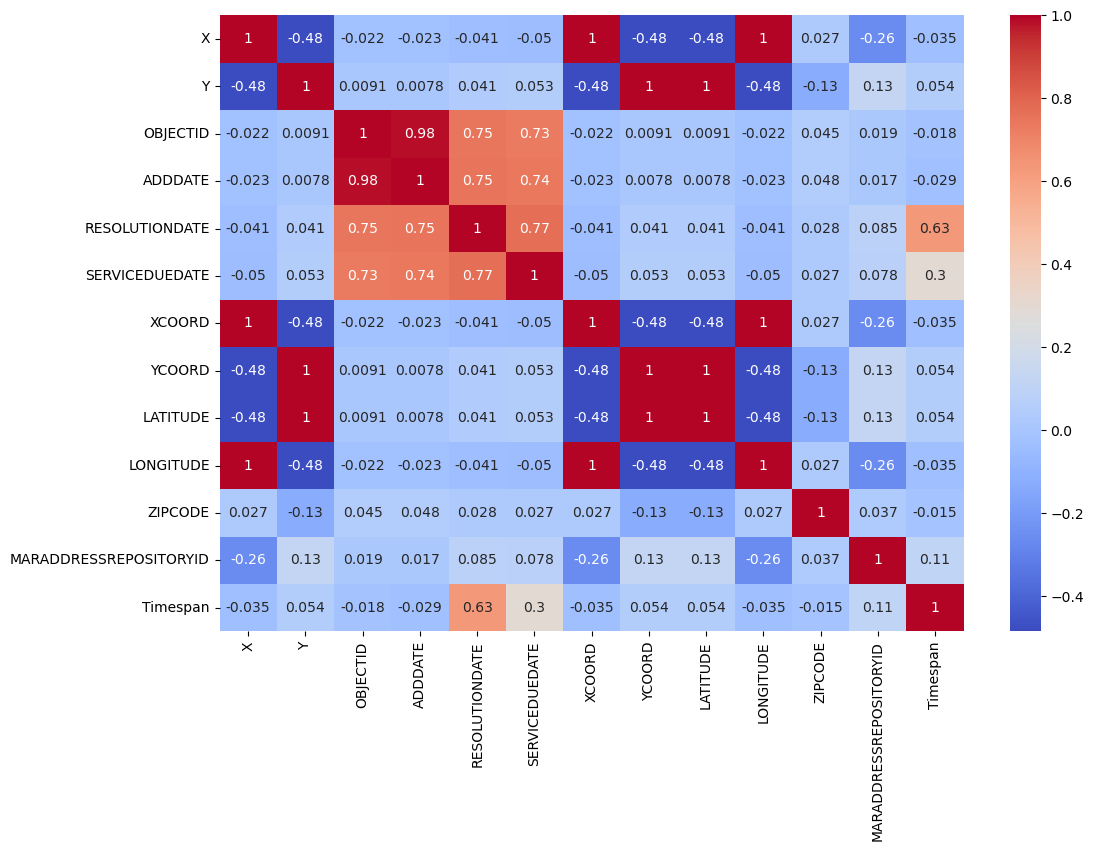

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

We obeserved that RESOLUTIONDATE and SERVICEDUEDATE have corelation with the target variable Timespan. However since there are various factors that can impact the Timespan, we decided to consider them and proceededto ty to solve the problem. 

In [39]:
df1 = df1.dropna(subset=['ADDDATE','RESOLUTIONDATE','SERVICEDUEDATE' ,'MARADDRESSREPOSITORYID','YCOORD','LATITUDE','ZIPCODE' ,'OBJECTID'])

##### Apply Various Regression Models to the dataset

##### 1. Linear Regression

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Extract relevant features and target variable
X = df1[['RESOLUTIONDATE','SERVICEDUEDATE' ,'MARADDRESSREPOSITORYID','YCOORD','XCOORD']]
y = df1['Timespan']

# Reference X-coord and Y-coord
ref_XCOORD, ref_YCOORD = 400430.11, 131768.69

# Calculate distance from the reference point
X['Distance_coord'] = ((df1['YCOORD'] - ref_YCOORD)**2 + (df1['XCOORD'] - ref_XCOORD)**2)**0.5

# Drop the original latitude and longitude columns
X = X.drop(['YCOORD', 'XCOORD'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')


C:\Users\gaurk\AppData\Local\Temp\ipykernel_9088\3902228439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Distance_coord'] = ((df1['YCOORD'] - ref_YCOORD)**2 + (df1['XCOORD'] - ref_XCOORD)**2)**0.5


R-squared (Train): 0.49478123754062986
R-squared (Test): 0.5040662309431896
Mean Squared Error (Train): 2026310.6967420746
Mean Squared Error (Test): 2046001.0204761825


- Linear Regression performed 50% here, which can be improved further, hence we considered other regression models. 

###### Random Forest Regressor

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the random forest regression model
model = RandomForestRegressor(n_estimators=10, random_state=42) 
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')


ERROR! Session/line number was not unique in database. History logging moved to new session 837
R-squared (Train): 0.9916893035603552
R-squared (Test): 0.9552595631418204
Mean Squared Error (Train): 33332.20051261018
Mean Squared Error (Test): 184579.04095234058


- Random Forest Regressor performed well, but the MSE can be improved hence we tried hyperparameters on the random forest model.
- Please note that the hyperparameters might run longer on our dataset, here are the best hyperparameters that we have got: 
###### Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

- Please note that the hyperparameter execution takes huge time to run, hence we are passing the best hyperparameter we have got and passing it to the model. 
- Please see the snip below to refer the output of the best hyperparameters we have got from above code :
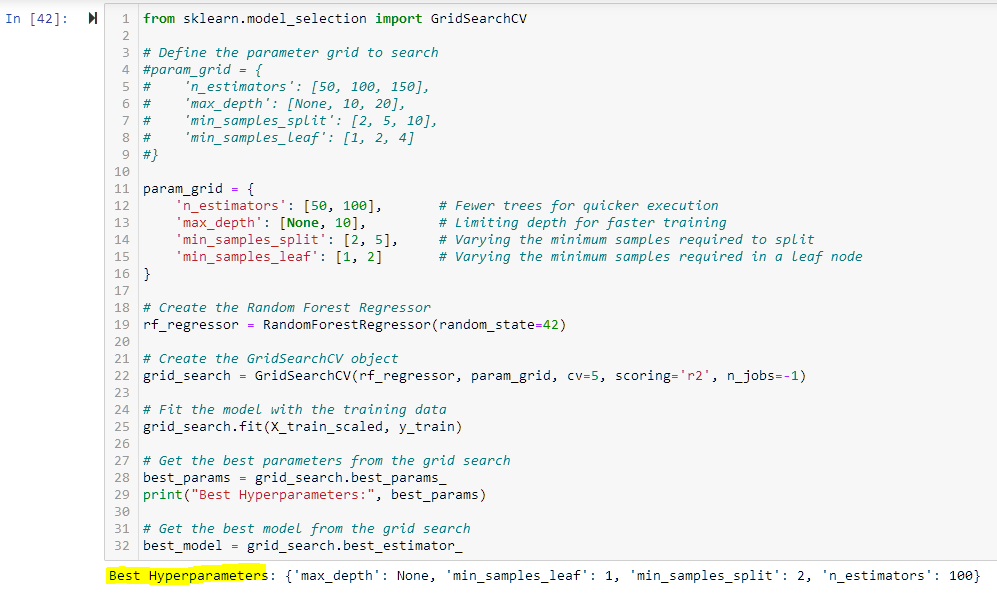

###### Apply these Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} to the model 

Please Uncomment the code below and execute if hyperparameters needs to be derived again:

In [43]:
"""
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
#param_grid = {
#    'n_estimators': [50, 100, 150],  
#    'max_depth': [None, 10, 20],      
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

param_grid = {
    'n_estimators': [50, 100],       # Fewer trees for quicker execution
    'max_depth': [None, 10],         # Limiting depth for faster training
    'min_samples_split': [2, 5],     # Varying the minimum samples required to split
    'min_samples_leaf': [1, 2]       # Varying the minimum samples required in a leaf node
}

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
# Make predictions on the training set
y_train_pred_best = best_model.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
r2_train_best = r2_score(y_train, y_train_pred_best)
r2_test_best = r2_score(y_test, y_test_pred_best)
mse_train_best = mean_squared_error(y_train, y_train_pred_best)
mse_test_best = mean_squared_error(y_test, y_test_pred_best)

print(f'R-squared (Train) - Best Model: {r2_train_best}')
print(f'R-squared (Test) - Best Model: {r2_test_best}')
print(f'Mean Squared Error (Train) - Best Model: {mse_train_best}')
print(f'Mean Squared Error (Test) - Best Model: {mse_test_best}')
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid to search\n#param_grid = {\n#    \'n_estimators\': [50, 100, 150],  \n#    \'max_depth\': [None, 10, 20],      \n#    \'min_samples_split\': [2, 5, 10],\n#    \'min_samples_leaf\': [1, 2, 4]\n#}\n\nparam_grid = {\n    \'n_estimators\': [50, 100],       # Fewer trees for quicker execution\n    \'max_depth\': [None, 10],         # Limiting depth for faster training\n    \'min_samples_split\': [2, 5],     # Varying the minimum samples required to split\n    \'min_samples_leaf\': [1, 2]       # Varying the minimum samples required in a leaf node\n}\n\n# Create the Random Forest Regressor\nrf_regressor = RandomForestRegressor(random_state=42)\n\n# Create the GridSearchCV object\ngrid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=\'r2\', n_jobs=-1)\n\n# Fit the model with the training data\ngrid_search.fit(X_train_scaled, y_train)\n\n# Get the best parameters from the grid search\nbest_params =

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best hyperparameters obtained from GridSearchCV
best_hyperparameters = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# Create and train the random forest regression model with best hyperparameters
model = RandomForestRegressor(**best_hyperparameters, random_state=42) 
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')


R-squared (Train): 0.9940205911223106
R-squared (Test): 0.9589116767840719
Mean Squared Error (Train): 23981.96795003446
Mean Squared Error (Test): 169512.05276730025


- The R2 score was a decent score already. we can see MSE score is improved with this.

###### Gradient Boosting Regressor

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the gradient boosting regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')


R-squared (Train): 0.9235952919290676
R-squared (Test): 0.9246797188893467
Mean Squared Error (Train): 306440.87027159147
Mean Squared Error (Test): 310737.80740527954


###### Extreme Gradient Boosting Regressor

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the XGBoost regression model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on the testing set
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'R-squared (Train): {r2_train}')
print(f'R-squared (Test): {r2_test}')
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')


R-squared (Train): 0.9395048577174232
R-squared (Test): 0.9365486578285603
Mean Squared Error (Train): 242631.43615529747
Mean Squared Error (Test): 261771.87143406158


- From above results, we can see that Gradient Boosting Regressor and Extreme Gradient Bosster performed somewhat similar. 

###### Based on the comprehensive model evaluation, it can be inferred that the tuned Random Forest Regressor is the most suitable model for our dataset and problem statement.

## Problem Statement 3 - Predict the zip code of the location where the service is required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
import seaborn as sns

In [2]:
#use the csv file 311_City_Service_Requests_in_2021.csv.
zipcode_pred_data=pd.read_csv("311_City_Service_Requests_in_2021.csv")
zipcode_pred_data=zipcode_pred_data[:50000]
zipcode_pred_data.head()

C:\Users\gaurk\AppData\Local\Temp\ipykernel_2932\189680271.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  zipcode_pred_data=pd.read_csv("311_City_Service_Requests_in_2021.csv")


,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 05:32:05+00,2021/01/06 15:34:42+00,...,20001.0,230050,5,NaN,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 05:06:02+00,2021/01/01 05:07:01+00,...,20032.0,301360,8,NaN,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2021/01/01 05:33:08+00,2021/01/05 05:55:04+00,...,20011.0,252336,4,NaN,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3},NaN,NaN,NaN,NaN
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2021/01/01 11:58:18+00,2021/01/04 12:54:36+00,...,20019.0,24709,7,NaN,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8},NaN,NaN,NaN,NaN
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,1,2021/01/01 06:05:25+00,2021/01/26 21:40:13+00,...,20016.0,266186,3,NaN,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B},NaN,NaN,NaN,NaN


In [3]:
zipcode_pred_data.shape

(50000, 36)

In [4]:
%%time
#dropping columns
df2 = zipcode_pred_data.drop(['INSPECTIONFLAG', 'INSPECTIONDATE', 'INSPECTORNAME', 'STATUS_CODE', 
                    'GIS_ID','CREATOR','CREATED','EDITOR' ,'EDITED','SERVICECALLCOUNT','SERVICEORDERDATE'],axis=1)

Wall time: 20 ms


In [5]:
df2.dtypes

X                             float64
Y                             float64
OBJECTID                        int64
SERVICECODE                    object
SERVICECODEDESCRIPTION         object
SERVICETYPECODEDESCRIPTION     object
ORGANIZATIONACRONYM            object
ADDDATE                        object
RESOLUTIONDATE                 object
SERVICEDUEDATE                 object
SERVICEORDERSTATUS             object
SERVICEREQUESTID               object
PRIORITY                       object
STREETADDRESS                  object
XCOORD                        float64
YCOORD                        float64
LATITUDE                      float64
LONGITUDE                     float64
CITY                           object
STATE                          object
ZIPCODE                       float64
MARADDRESSREPOSITORYID          int64
WARD                           object
DETAILS                        object
GLOBALID                       object
dtype: object

In [6]:
# Converting the Objects to datetime for the date realted columns:
df2['ADDDATE'] = pd.to_datetime(df2['ADDDATE'])
df2['RESOLUTIONDATE'] = pd.to_datetime(df2['RESOLUTIONDATE'])
df2['SERVICEDUEDATE'] = pd.to_datetime(df2['SERVICEDUEDATE'])

In [7]:
#converting datetime columns to seconds
df2['ADDDATE'] = (df2['ADDDATE'] - df2['ADDDATE'].min()).dt.total_seconds() / 3600
df2['RESOLUTIONDATE'] = (df2['RESOLUTIONDATE'] - df2['RESOLUTIONDATE'].min()).dt.total_seconds() / 3600
df2['SERVICEDUEDATE'] = (df2['SERVICEDUEDATE'] - df2['SERVICEDUEDATE'].min()).dt.total_seconds() / 3600
df2.head(10)

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,ADDDATE,RESOLUTIONDATE,SERVICEDUEDATE,...,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,GLOBALID
0,-77.014822,38.914546,9591692,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.434167,130.461389,75.495556,...,138519.22,38.914538,-77.014820,WASHINGTON,DC,20001.0,230050,5,NaN,{B7D1802E-75AA-7CDF-E053-532F520AE3B3}
1,-76.995047,38.853735,9591693,BICYCLE,Abandoned Bicycle,SWMA- Solid Waste Management Admistration,DPW,0.000000,0.000000,128.495556,...,131768.69,38.853728,-76.995045,WASHINGTON,DC,20032.0,301360,8,NaN,{B7D1802E-75AB-7CDF-E053-532F520AE3B3}
2,-77.024386,38.946008,9591695,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.451667,96.800833,201.064444,...,142011.95,38.946000,-77.024384,WASHINGTON,DC,20011.0,252336,4,NaN,{B7D1802E-75AD-7CDF-E053-532F520AE3B3}
3,-76.942117,38.878522,9591696,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,6.871111,79.793056,32.495556,...,134521.77,38.878514,-76.942115,WASHINGTON,DC,20019.0,24709,7,NaN,{B7D764C0-4508-BB8F-E053-532F520A63E8}
4,-77.083344,38.946074,9591903,S05SL,Streetlight Repair Investigation,Transportation Operations Administration,DDOT,0.989722,616.553333,201.602500,...,142022.34,38.946067,-77.083342,WASHINGTON,DC,20016.0,266186,3,NaN,{B7D25EBE-F302-E2F7-E053-542F520AD49B}
5,-76.998094,38.961588,9591904,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,0.893333,152.290833,104.495556,...,143741.22,38.961580,-76.998092,WASHINGTON,DC,20011.0,2761,4,NaN,{B7D25EBE-F303-E2F7-E053-542F520AD49B}
6,-76.998934,38.961860,9591905,S0441,Trash Collection - Missed,SWMA- Solid Waste Management Admistration,DPW,0.931944,36.919722,33.544722,...,143771.39,38.961852,-76.998932,WASHINGTON,DC,20011.0,5538,4,NaN,{B7D25EBE-F304-E2F7-E053-542F520AD49B}
7,-77.024037,38.950293,9591906,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.718889,153.456111,99.495556,...,142487.64,38.950285,-77.024035,WASHINGTON,DC,20011.0,251903,4,NaN,{B7D91AC0-3906-F9B3-E053-542F520A2FDD}
8,-77.040372,38.921705,9591907,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,9.298056,128.124722,80.495556,...,139314.62,38.921697,-77.040369,WASHINGTON,DC,20009.0,235663,1,NaN,{B7D91AC0-3907-F9B3-E053-542F520A2FDD}
9,-76.949960,38.902276,9591908,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,8.836944,9.320556,17.449722,...,137158.31,38.902268,-76.949958,WASHINGTON,DC,20019.0,309256,7,NaN,{B7D91AC0-3908-F9B3-E053-542F520A2FDD}


In [8]:
import pandas as pd
df2 = df2.dropna(subset=['RESOLUTIONDATE'])
df2 = df2.dropna(subset=['PRIORITY'])
df2 = df2.dropna(subset=['SERVICEDUEDATE'])

In [9]:
# Print all columns in the DataFrame
print("Columns in the DataFrame:")
for column in df2.columns:
    print(column)

Columns in the DataFrame:
X
Y
OBJECTID
SERVICECODE
SERVICECODEDESCRIPTION
SERVICETYPECODEDESCRIPTION
ORGANIZATIONACRONYM
ADDDATE
RESOLUTIONDATE
SERVICEDUEDATE
SERVICEORDERSTATUS
SERVICEREQUESTID
PRIORITY
STREETADDRESS
XCOORD
YCOORD
LATITUDE
LONGITUDE
CITY
STATE
ZIPCODE
MARADDRESSREPOSITORYID
WARD
DETAILS
GLOBALID


#### Perform Feature Importance on the target variable ZIPCODE:

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode categorical features
categorical_features = ['SERVICECODE','SERVICECODEDESCRIPTION','SERVICETYPECODEDESCRIPTION','ORGANIZATIONACRONYM',
                        'SERVICEORDERSTATUS','SERVICEREQUESTID','PRIORITY','STREETADDRESS','CITY','STATE','ZIPCODE','MARADDRESSREPOSITORYID','WARD','DETAILS','GLOBALID']


# Perform label encoding on categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    df2[feature] = label_encoder.fit_transform(df2[feature])

# Print the DataFrame with label-encoded categorical features
print("DataFrame with Label-Encoded Categorical Features:")
print(df2)


DataFrame with Label-Encoded Categorical Features:
               X          Y  OBJECTID  SERVICECODE  SERVICECODEDESCRIPTION  \
0     -77.014822  38.914546   9591692           52                       6   
1     -76.995047  38.853735   9591693            1                       0   
2     -77.024386  38.946008   9591695           85                      80   
3     -76.942117  38.878522   9591696           52                       6   
4     -77.083344  38.946074   9591903           85                      80   
...          ...        ...       ...          ...                     ...   
49995 -77.033045  38.940557   9647299           84                      89   
49996 -77.040371  38.948825   9647300           68                      52   
49997 -76.970206  38.897271   9647301           50                       4   
49998 -76.982050  38.886180   9647302           87                      67   
49999 -76.999199  38.878802   9647303           13                      20   

       SERVI

In [11]:
X=df2.drop('ZIPCODE',axis=1)
y=df2['ZIPCODE']

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

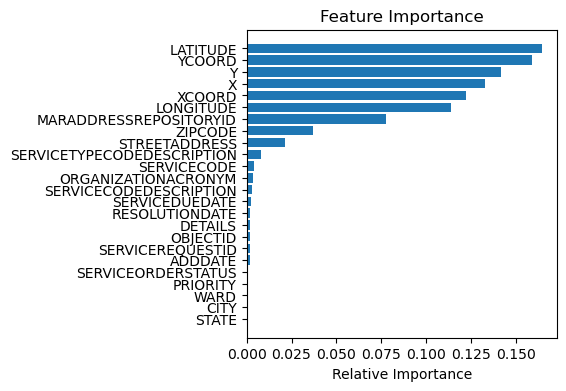

In [12]:
# Displaying the relative feature importance by a horizontal bar chart
sorted_idx = np.argsort(feature_importances)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(4, 4))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importances[sorted_idx], align="center")
plt.yticks(pos, df2.columns[:-1][sorted_idx])
plt.show()

In [13]:
significant_df =df2[['YCOORD','XCOORD','LATITUDE', 'LONGITUDE','MARADDRESSREPOSITORYID','STREETADDRESS']]

y = df2["ZIPCODE"]    # Target
X = significant_df    #Features

In [14]:
from sklearn.metrics import accuracy_score

##### Apply various Classification models on the data

###### 1. Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing logistic regression
logreg = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)

# Fit the model
logreg.fit(X_train_scaled, y_train)

# Predict the 'ZIPCODE' for train data
y_tr_pred = logreg.predict(X_train_scaled)

# Predict the 'ZIPCODE' for test data
y_ts_pred = logreg.predict(X_test_scaled)

# Compute train accuracy
tr_score = metrics.accuracy_score(y_train, y_tr_pred)

# Compute test accuracy
ts_score = metrics.accuracy_score(y_test, y_ts_pred)

# Generate classification report for train data
tr_report = classification_report(y_train, y_tr_pred)

# Generate classification report for test data
ts_report = classification_report(y_test, y_ts_pred)

print('Train Classification Report: \n\n', tr_report, '\n\n')
print('Test Classification Report: \n\n', ts_report)


Train Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.93      0.90      2525
           1       0.94      0.94      0.94      4633
           2       0.96      0.94      0.95      1796
           3       0.76      0.60      0.67       146
           4       0.68      0.34      0.46       361
           5       0.00      0.00      0.00        56
           6       0.94      0.95      0.95      1143
           7       0.87      0.79      0.83      1007
           8       0.77      0.93      0.85      2058
           9       0.82      0.90      0.85      1715
          10       0.94      0.94      0.94      3781
          11       0.99      0.88      0.93       901
          12       0.92      0.97      0.95      1044
          13       0.92      0.91      0.92      1376
          14       0.86      0.79      0.82      1008
          15       0.88      0.87      0.88      1268
          16       0.99      0.97      0.98      

E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classif

After performing logistic regression classifier, we can see that f1 score of many zipcodes is very less. So, we can say that this model is performing very low in predicting ZIPCODE's.

###### 2. Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Choose a classifier - Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict ZIPCODE on the test set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Evaluate the model
classification_rep_test = classification_report(y_test, y_pred_test)
classification_rep_train = classification_report(y_train, y_pred_train)

print(f'Classification Report test:\n{classification_rep_test}')
print(f'Classification Report train:\n{classification_rep_train}')

Classification Report test:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1044
           1       1.00      1.00      1.00      2023
           2       0.99      0.99      0.99       781
           3       0.98      0.91      0.94        56
           4       0.98      0.97      0.97       146
           5       0.83      0.90      0.86        21
           6       1.00      1.00      1.00       487
           7       0.97      1.00      0.98       411
           8       1.00      1.00      1.00       927
           9       1.00      0.99      0.99       755
          10       1.00      1.00      1.00      1645
          11       1.00      1.00      1.00       410
          12       1.00      1.00      1.00       440
          13       1.00      1.00      1.00       607
          14       0.99      0.99      0.99       420
          15       0.99      0.99      0.99       528
          16       1.00      1.00      1.00      1328

E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.

After observing the results of predictionof Decision Tree Classifier on train data, precision, recall and f1-score are 1. Which indicates and overfit of data.

###### 3. Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Choose a classifier - Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict "ZIPCODE" on the train and test set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Evaluate the model
classification_rep_test = classification_report(y_test, y_pred_test)
classification_rep_train = classification_report(y_train, y_pred_train)

print(f'Classification Report test:\n{classification_rep_test}')
print(f'Classification Report train:\n{classification_rep_train}')

Classification Report test:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1044
           1       1.00      1.00      1.00      2023
           2       1.00      1.00      1.00       781
           3       0.98      0.89      0.93        56
           4       0.97      0.97      0.97       146
           5       0.83      0.95      0.89        21
           6       0.99      1.00      1.00       487
           7       0.99      0.99      0.99       411
           8       1.00      1.00      1.00       927
           9       1.00      1.00      1.00       755
          10       1.00      1.00      1.00      1645
          11       1.00      1.00      1.00       410
          12       1.00      1.00      1.00       440
          13       0.99      1.00      1.00       607
          14       1.00      1.00      1.00       420
          15       1.00      0.99      1.00       528
          16       1.00      1.00      1.00      1328

E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.

Just like Decision Tree Classifier, RandomForestClassifier is also not giving good results on train data. precision, recall and f1-score are 1. Which indicates and overfit of data.

###### 4. Gradient Boosting Classifier

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=5)

# Fit the model
gradient_boosting_model.fit(X_train_scaled, y_train)

# Predict 'ZIPCODE' for train data
y_tr_pred = gradient_boosting_model.predict(X_train_scaled)

# Predict 'ZIPCODE' for test data
y_ts_pred = gradient_boosting_model.predict(X_test_scaled)

# Compute train accuracy
tr_score = metrics.accuracy_score(y_train, y_tr_pred)

# Compute test accuracy
ts_score = metrics.accuracy_score(y_test, y_ts_pred)

# Generate classification report for train data
tr_report = classification_report(y_train, y_tr_pred)

# Generate classification report for test data
ts_report = classification_report(y_test, y_ts_pred)

print('Train Classification Report: \n\n', tr_report, '\n\n')
print('Test Classification Report: \n\n', ts_report)


Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2525
           1       1.00      1.00      1.00      4633
           2       1.00      1.00      1.00      1796
           3       0.97      0.99      0.98       146
           4       1.00      1.00      1.00       361
           5       1.00      1.00      1.00        56
           6       1.00      1.00      1.00      1143
           7       1.00      1.00      1.00      1007
           8       1.00      1.00      1.00      2058
           9       1.00      1.00      1.00      1715
          10       1.00      1.00      1.00      3781
          11       1.00      1.00      1.00       901
          12       1.00      1.00      1.00      1044
          13       1.00      1.00      1.00      1376
          14       1.00      1.00      1.00      1008
          15       1.00      1.00      1.00      1268
          16       1.00      1.00      1.00      

E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.

GradientBoostingClassifier is also not giving good results. precision, recall and f1-score are 1. Which indicates and overfit of data.

###### 5. Gaussian Naive Bayes classifier

In [20]:
from sklearn.naive_bayes import GaussianNB

# Choose a classifier - Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict "ZIPCODE" on the training set
y_train_pred = clf.predict(X_train)

# Predict "ZIPCODE" on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print(f'Training Accuracy: {accuracy_train}')
print(f'Training Classification Report:\n{classification_rep_train}')
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Classification Report:\n{classification_rep_test}')

Training Accuracy: 0.9198762433495258
Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2525
           1       0.95      0.96      0.95      4633
           2       0.99      0.91      0.95      1796
           3       0.76      0.87      0.81       146
           4       0.87      0.76      0.81       361
           5       0.74      0.88      0.80        56
           6       0.96      0.91      0.93      1143
           7       0.81      0.77      0.79      1007
           8       0.84      0.96      0.90      2058
           9       0.89      0.94      0.91      1715
          10       0.95      0.91      0.93      3781
          11       0.90      0.89      0.90       901
          12       0.90      0.96      0.93      1044
          13       0.90      0.88      0.89      1376
          14       0.79      0.81      0.80      1008
          15       0.89      0.87      0.88      1268
          1

E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classif

After observing results of GaussianNB classifier, prescisin, recall and f1 score are not 1. Results are varying freom 93 to 70 where there are sufficient number of sample for ZIPCODE prediction. Still trying other models to identify one which performs more accurate.

###### 6. KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Choose a classifier - KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# Predict "ZIPCODE" on the training set
y_train_pred = clf.predict(X_train)

# Predict "ZIPCODE" on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print(f'Training Accuracy: {accuracy_train}')
print(f'Training Classification Report:\n{classification_rep_train}')
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Classification Report:\n{classification_rep_test}')

E:\SW_Setup\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

Training Accuracy: 0.9764631043256997
Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2525
           1       0.98      0.98      0.98      4633
           2       0.96      0.97      0.96      1796
           3       0.84      0.82      0.83       146
           4       0.87      0.94      0.90       361
           5       0.75      0.70      0.72        56
           6       0.98      0.99      0.99      1143
           7       0.97      0.96      0.96      1007
           8       0.97      0.97      0.97      2058
           9       0.97      0.97      0.97      1715
          10       0.99      0.99      0.99      3781
          11       0.98      0.97      0.97       901
          12       0.98      0.99      0.99      1044
          13       0.98      0.97      0.98      1376
          14       0.97      0.97      0.97      1008
          15       0.98      0.99      0.98      1268
          1

E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classif

###### Implimenting gridsearchCV to find hyperparameters that best suit the model

In [23]:
from sklearn.model_selection import GridSearchCV
# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Define the parameter grid to search (Note: Naive Bayes typically has fewer hyperparameters)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


E:\SW_Setup\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'var_smoothing': 1e-09}
Best Accuracy: 0.9182569974554706


In [24]:
clf = GaussianNB(var_smoothing = 1e-08)
clf.fit(X_train, y_train)

# Predict "ZIPCODE" on the training set
y_train_pred = clf.predict(X_train)

# Predict "ZIPCODE" on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print(f'Training Accuracy: {accuracy_train}')
print(f'Training Classification Report:\n{classification_rep_train}')
print(f'Test Accuracy: {accuracy_test}')
print(f'Test Classification Report:\n{classification_rep_test}')

Training Accuracy: 0.9198762433495258
Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2525
           1       0.95      0.96      0.95      4633
           2       0.99      0.91      0.95      1796
           3       0.76      0.87      0.81       146
           4       0.87      0.76      0.81       361
           5       0.74      0.88      0.80        56
           6       0.96      0.91      0.93      1143
           7       0.81      0.77      0.79      1007
           8       0.84      0.96      0.90      2058
           9       0.89      0.94      0.91      1715
          10       0.95      0.91      0.93      3781
          11       0.90      0.89      0.90       901
          12       0.90      0.96      0.93      1044
          13       0.90      0.88      0.89      1376
          14       0.79      0.81      0.80      1008
          15       0.89      0.87      0.88      1268
          1

E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SW_Setup\anaconda3\lib\site-packages\sklearn\metrics\_classif

###### Upon reviewing the outcomes, it is evident that the Gaussian Naive Bayes classifier with the specified hyperparameters exhibits superior performance compared to its counterpart without hyperparameters and comapres to other classification models as well.